# Mesa Schelling example - Schelling Segregation Model

[[Code explanation]](https://towardsdatascience.com/introduction-to-mesa-agent-based-modeling-in-python-bcb0596e1c9a) **Note that the final interactive visualization part we will cover in the later parts of the course**

## Background

The Schelling (1971) segregation model is a classic of agent-based modeling, demonstrating how agents following simple rules lead to the emergence of qualitatively different macro-level outcomes. Agents are randomly placed on a grid. There are two types of agents, one constituting the majority and the other the minority. All agents want a certain number (generally, 3) of their 8 surrounding neighbors to be of the same type in order for them to be happy. Unhappy agents will move to a random available grid space. While individual agents do not have a preference for a segregated outcome (e.g. they would be happy with 3 similar neighbors and 5 different ones), the aggregate outcome is nevertheless heavily segregated.

# 1. Create the Basic Agent/Model

In [27]:
from mesa import Model, Agent
from mesa.time import RandomActivation
from mesa.space import SingleGrid

In [30]:
# Agent

class SchellingAgentBasic(Agent):
    
    def __init__(self, pos, model):
        
        super().__init__(pos, model)
        
        # 1 Initialization
        
    def step(self):
        
        # 2 Step agent function


SyntaxError: unexpected EOF while parsing (650305898.py, line 13)

In [12]:
# Model

class SchellingModelBasic(Model):

    def __init__(self, height, width):
        '''
        Create a new Schelling model.

         Args:
            width: Horizontal axis of the grid which is used together with Height to define the total number of agents in the system.
            height: Vertical axis of the grid which is used together with Width to define the total number of agents in the system.
         '''
        super().__init__()
        
        # 1 Initialization

        for cell in self.grid.coord_iter():
            x = cell[1]
            y = cell[2]
            
            # We use a grid iterator that returns the coordinates of a cell as well as its contents. (coord_iter)
        
            # 2 Create agents

    def step(self):
        
        self.schedule.step()
        
        # 3 Step model function

# 2. Run the Agent/Model Basic

In [ ]:
model = SchellingModelBasic(10, 10, ) # < Add model parameters
for i in range(10):
    model.step()

# 3. Visualize the Agent/Model

In [ ]:
from mesa.visualization.modules import CanvasGrid
from mesa.visualization.ModularVisualization import ModularServer


def agent_portrayal(agent):
    portrayal = {"Shape": "circle",
                 "Filled": "true",
                 "Layer": 0,
                 "Color": "red",
                 "r": 0.5}
    return portrayal

grid = CanvasGrid(agent_portrayal, 10, 10, 500, 500)
server = ModularServer(SchellingModelBasic,
                       [grid],
                       "Schelling Model",
                       {"width":10, "height":10}) # < Add model parameters

# 4. Run the Agent/Model Visualization

In [ ]:
server.port = 8521 # The default
server.launch()

# 5. Collect data to Analyze the Agent/Model

The model has a DataCollector object, which checks and stores how many agents are happy at the end of each step. It can also generate a pandas DataFrame of the data it has collected:

In [19]:
model_out = model.datacollector.get_model_vars_dataframe()
model_out.head()

,Happy,Segregated_Agents
0,63,0.205128
1,65,0.230769
2,67,0.205128
3,70,0.307692
4,71,0.243590


Finally, we can plot the 'happy' series:

<AxesSubplot:>

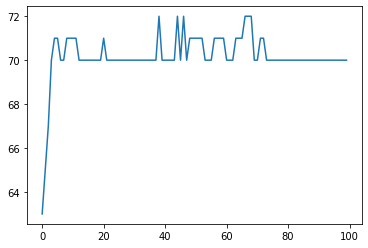

In [20]:
model_out.Happy.plot()

For testing purposes, here is a table giving each agent's x and y values at each step.

In [21]:
x_positions = model.datacollector.get_agent_vars_dataframe()
x_positions.head()

x  y
Step AgentID      
1    (0, 0)   7  0
     (0, 1)   3  7
     (0, 3)   7  2
     (0, 4)   6  9
     (0, 7)   4  3

# Effect of Homophily on segregation

Now, we can do a parameter sweep to see how segregation changes with homophily.

First, we create a function which takes a model instance and returns what fraction of agents are segregated -- that is, have no neighbors of the opposite type.

In [22]:
from mesa.batchrunner import batch_run

params = {"height": 10, "width": 10, "density": 0.8, "minority_pc": 0.2, 
              "homophily": range(1,9)}

results = batch_run(
    SchellingModel,
    parameters=params,
    iterations=10,
    max_steps=200,
    number_processes=None,
    data_collection_period=1,
    display_progress=True,
)

80it [00:03, 20.14it/s]


In [23]:
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df.keys())

Index(['RunId', 'iteration', 'Step', 'height', 'width', 'density',
       'minority_pc', 'homophily', 'Happy', 'Segregated_Agents', 'AgentID',
       'x', 'y'],
      dtype='object')


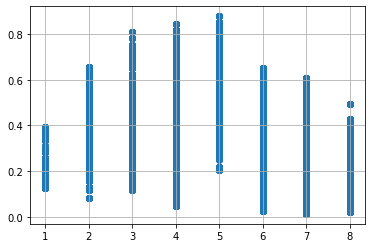

In [26]:
plt.scatter(results_df.homophily, results_df.Segregated_Agents)
plt.grid(True)